In [72]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pygwalker as pyg
import random

In [2]:
# Leer el archivo CSV
df = pd.read_csv('..//data//diabetes.csv')

In [3]:
# Mostrar las primeras filas para verificar
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [4]:
# Conectar a la base de datos SQLite
conn = sqlite3.connect('..//data//diabetes2.db')

In [5]:
# Leer la tabla completa en un DataFrame
df_BD = pd.read_sql_query('SELECT * FROM diabetes_tab', conn)

In [6]:
# Mostrar las primeras filas
print(df_BD.head(10))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.

In [7]:
# Cerrar conexión
conn.close()

In [8]:
# Obtener conjuntos de columnas
col_csv = set(df.columns)
col_BD = set(df_BD.columns)

In [9]:
# Columnas únicas en SQLite (no en CSV)
col_unicasBD = col_BD - col_csv

# Columnas únicas en CSV (no en SQLite)
col_unicas = col_csv - col_BD

In [10]:
# Crear DataFrames solo con las columnas únicas
df_unicas = df[list(col_unicas)] if col_unicasBD else pd.DataFrame()
df_unicasBD = df_BD[list(col_unicasBD)] if col_unicas else pd.DataFrame()

In [11]:
# Combinar ambos DataFrames (lado a lado)
df_combinada = pd.concat([df_unicas, df_unicasBD], axis=1)

In [75]:
# Crear una columna con provincias aleatorias para hacer varias consultas
def crear_provincias(provincias):
    
    return [random.choice(provincias) for _ in range(768)]

In [76]:
ciudades = ["Azuay", "Bolivar", "Cañar", "Carchi", "Chimborazo", "Cotopaxi", "El Oro", "Esmeraldas", "Galapagos", "Guayas", "Imbabura", "Loja", "Los Rios", "Manabi", "Morona Santiago", "Napo", "Orellana", "Pastaza", "Pichincha", "Santa Elena", "Santo Domingo de los Tsáchilas", "Sucumbios", "Tungurahua", "Zamora" ]
ciudades_r = crear_provincias(ciudades)

In [77]:
df_combinada['ciudades'] = ciudades_r

In [78]:
print(df_combinada.head(10))

   BloodPressure  DiabetesPedigreeFunction  Glucose  Outcome  Insulin  \
0             72                     0.627      148        1        0   
1             66                     0.351       85        0        0   
2             64                     0.672      183        1        0   
3             66                     0.167       89        0       94   
4             40                     2.288      137        1      168   
5             74                     0.201      116        0        0   
6             50                     0.248       78        1       88   
7              0                     0.134      115        0        0   
8             70                     0.158      197        1      543   
9             96                     0.232      125        1        0   

   Pregnancies  SkinThickness  NoDocbcCost  CholCheck  PhysHlth  ...  Fruits  \
0            6             35          0.0        1.0      15.0  ...     0.0   
1            1             29       

In [79]:
# Guardar a CSV
df_combinada.to_csv('..//data//diabetes_combinada.csv', index=False)

In [80]:
# Graficos de matplotlib
# Calcular media de cada columna única de dataset resultante
media = df_combinada.mean(numeric_only=True)

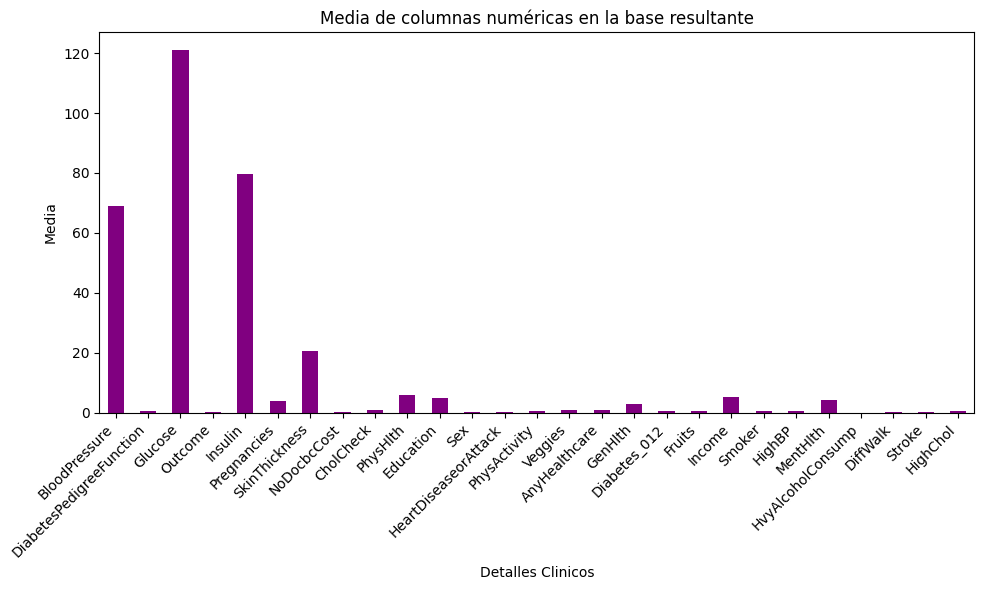

In [81]:
# Graficar
plt.figure(figsize=(10,6))
media.plot(kind='bar', color='purple')
plt.title('Media de columnas numéricas en la base resultante')
plt.xlabel('Detalles Clinicos')
plt.ylabel('Media')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("..//image//Matplotlib.jpg")
plt.show()

In [82]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

In [83]:
# Graficos de bokeh calcular cuantas peronas tienen glucosa mayor a 20 
!pip install bokeh

In [84]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [85]:
output_notebook()  # Permite visualizar dentro de Jupyter Notebook

Loading BokehJS ...

In [86]:
# Filtrar columnas numéricas
df_num = df_combinada.select_dtypes(include='number')

In [87]:
# Calcular el percentil 25 para esa columna
umbral = df_num.quantile(0.25)

In [88]:
# Contar cuántos valores superan ese umbral en cada columna
valores_altos = (df_num > umbral).sum()

In [89]:
# Preparar datos
columnas = valores_altos.index.tolist()
cantidades = valores_altos.values

source = ColumnDataSource(data=dict(columnas=columnas, cantidades=cantidades))

In [90]:
# Crear gráfico
p = figure(x_range=columnas, height=400, title="Personas con valor alto (>25%)", toolbar_location=None, tools="")

p.vbar(x='columnas', top='cantidades', width=0.9, source=source, color="mediumseagreen")

GlyphRenderer(id='p1151', ...)

In [91]:
# Barras verticales
p.vbar(x='columnas', top='cantidades', width=0.6, source=source, color="orange")

GlyphRenderer(id='p1162', ...)

In [93]:
from bokeh.plotting import output_file, save

# Personalizar ejes
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Detalles Clinicos"
p.yaxis.axis_label = "Cantidad de personas"
p.y_range.start = 0
p.xgrid.grid_line_color = None
output_file("..//image//Bokeh.html")
save(p)
show(p)

In [56]:
# Graficar en pywalker
!pip install pygwalker

In [ ]:
# Iniciar la interfaz interactiva
pyg.walk(df_combinada)

Box(children=(HTML(value='\n<div id="ifr-pyg-000635e81a21f11bG89fpQKRkv4yc0b6" style="height: auto">\n    <hea…